### Dataset

AirBnb Seattle

Three questions about the dataset

- Which neighbourhood in seattle has the highest number of listings?
- Which are the highest rated neighbourhoods (min 50 reviews in total)?
- Which month of the year has a higher price of booking?

### Import necessary Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

### Data Gathering

In [2]:
# Read that data into dataframes

calendar = pd.read_csv('~/AirBnb/datasets/calendar.csv')
listings = pd.read_csv('~/AirBnb/datasets/listings.csv')
reviews = pd.read_csv('~/AirBnb/datasets/reviews.csv')

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Data Cleaning

In [6]:
# make a copy of the data where you want make changes 
calendar_cleaned = calendar

# remove the entries when the listing was not available for renting
calendar_cleaned = calendar_cleaned[calendar_cleaned["available"] == 't']

# remove unwanted characters like $ and , from the price column and convert to float for further analysis
calendar_cleaned["price"] = calendar_cleaned.apply(lambda x: x["price"].replace('$','').replace(',',''), axis=1)
calendar_cleaned["price"] = calendar_cleaned["price"].astype(float)

# convert the type of date column from string to datetime
calendar_cleaned["date"] = pd.to_datetime(calendar_cleaned["date"], format='%Y-%m-%d')

<ipython-input-6-8853cc4c2ea9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_cleaned["price"] = calendar_cleaned.apply(lambda x: x["price"].replace('$','').replace(',',''), axis=1)
<ipython-input-6-8853cc4c2ea9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_cleaned["price"] = calendar_cleaned["price"].astype(float)
<ipython-input-6-8853cc4c2ea9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [7]:
calendar_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [8]:
# make a copy of the data where you want to make changes
listings_cleaned = listings

# remove unwanted characters like $ and , from the price column and convert to float for further analysis
listings_cleaned["price"] = listings_cleaned.apply(lambda x : x["price"].replace('$','').replace(',',''), axis = 1)
listings_cleaned["price"] = listings_cleaned["price"].astype(float)

# keep only the columns that are required to answer the questions
listings_cleaned = listings_cleaned[["id", "neighbourhood_cleansed", "price",
                                     "review_scores_rating", "number_of_reviews"]]

listings_cleaned = listings_cleaned.dropna(axis=0)

### Data Analyzing

#### Which neighbourhood in seattle has the highest number of listings?

In [9]:
df1 = pd.DataFrame(listings_cleaned.groupby(by = ["neighbourhood_cleansed"])["id"].count().sort_values(ascending=False))

In [10]:
df1.head()

,id
neighbourhood_cleansed,
Broadway,321
Belltown,203
Wallingford,145
Fremont,134
Minor,124


<BarContainer object of 87 artists>

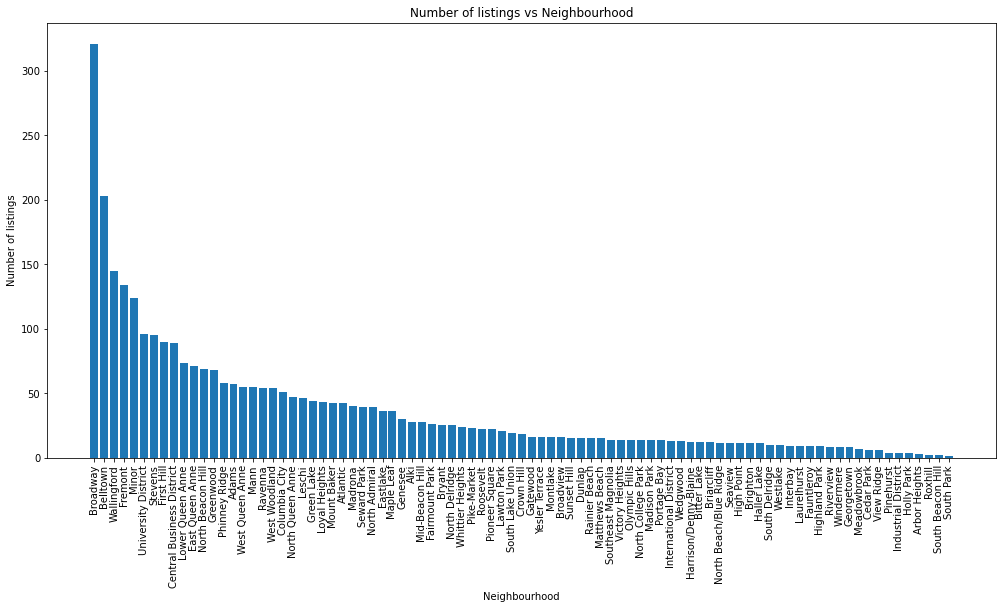

In [11]:
plt.figure(figsize=(17,8))
plt.title("Number of listings vs Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of listings")
plt.xticks(rotation = 90)

plt.bar(df1.index, df1.id)

The top 5 neighbourhoods with highest number of listings are 
- Broadway
- Belltown
- Wallingford
- Fremont
- Minor

#### Which are the highest rated neighbourhoods (min 50 reviews in total)?

In [12]:
df2 = listings_cleaned[['neighbourhood_cleansed', 'review_scores_rating', 'number_of_reviews']]
df2 = pd.DataFrame(df2.groupby(by=["neighbourhood_cleansed"])["review_scores_rating"].mean().sort_values(ascending = False)[df2.groupby(by=["neighbourhood_cleansed"])["number_of_reviews"].sum() >= 50])

In [13]:
df2.head()

,review_scores_rating
neighbourhood_cleansed,
Riverview,97.250000
Southeast Magnolia,97.214286
Madrona,97.100000
Harrison/Denny-Blaine,97.083333
Genesee,96.933333


<BarContainer object of 83 artists>

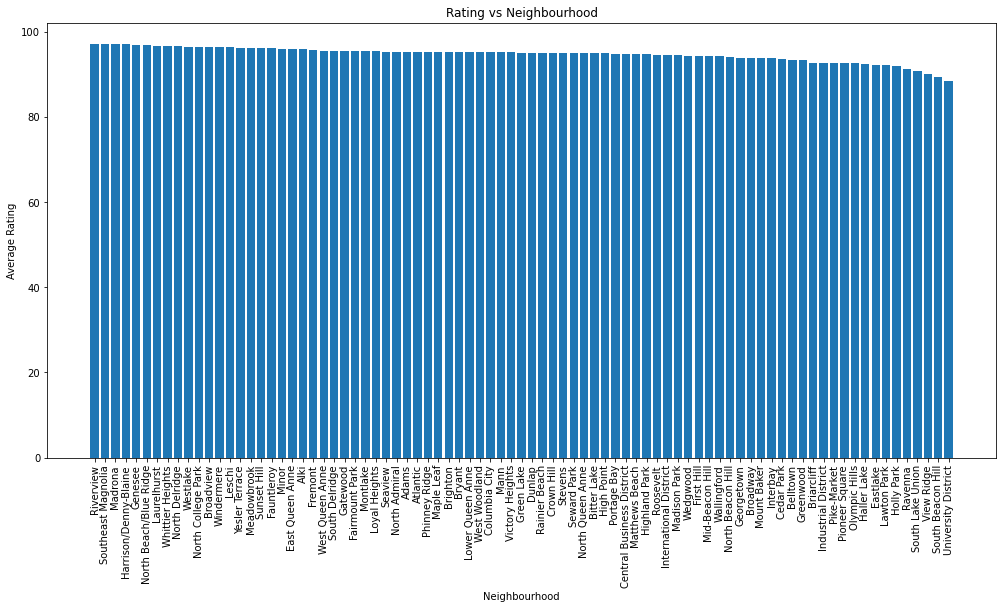

In [14]:
plt.figure(figsize=(17,8))
plt.title("Rating vs Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Rating")
plt.xticks(rotation = 90)

plt.bar(df2.index, df2.review_scores_rating)

Top 5 highest rated neighbourhoods
- Riverview
- Southeast Magnolia
- Madrona
- Harrison/Denny-Blaine
- Genesee

#### Which month of the year has a higher price of booking?

In [15]:
df3 = calendar_cleaned
df3["year"] = df3["date"].dt.year
df3["month"] = df3["date"].dt.month
df3.head()

<ipython-input-15-75649afabf9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["year"] = df3["date"].dt.year
<ipython-input-15-75649afabf9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["month"] = df3["date"].dt.month


,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,85.0,2016,1
1,241032,2016-01-05,t,85.0,2016,1
9,241032,2016-01-13,t,85.0,2016,1
10,241032,2016-01-14,t,85.0,2016,1
14,241032,2016-01-18,t,85.0,2016,1


In [16]:
df3 = pd.DataFrame(df3.groupby(by = ["month"])["price"].mean())

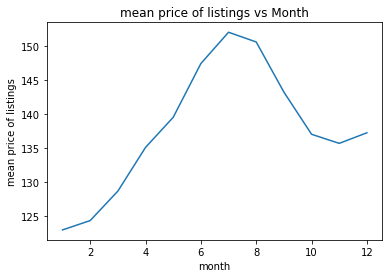

In [17]:
plt.title("mean price of listings vs Month")
plt.xlabel("month")
plt.ylabel("mean price of listings")
plt.plot(df3.index, df3.price);

We can see the price peaks in the month of June, July and August